In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer


import os
from scipy.sparse import coo_matrix

In [103]:
train_data = pd.read_csv('/content/marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv.txt',delimiter='\t')
print(train_data.columns)


Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')


In [104]:
train_data.head()

,Uniq Id,Crawl Timestamp,Dataset Origin,Product Id,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Currency,Product Available Inventory,Product Image Url,Product Model Number,Product Tags,Product Contents,Product Rating,Product Reviews Count,Bsr,Joining Key
0,1705736792d82aa2f2d3caf1c07c53f4,2020-09-24 03:21:12 +0000,NaN,2e17bf4acecdece67fc00f07ad62c910,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN,NaN,NaN,81350af1be98d3753cf964709f0c766a
1,95a9fe6f4810fcfc7ff244fd06784f11,2020-10-30 14:04:08 +0000,NaN,076e5854a62dd283c253d6bae415af1f,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,NaN,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN,NaN,NaN,0353e63907dc0de0c734db4690300057
2,8d4d0330178d3ed181b15a4102b287f2,2020-08-06 05:51:47 +0000,NaN,8a4fe5d9c7a6ed26cc44d785a454b124,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,NaN,Clairol Nice 'N Easy Permanent Color 7/106A Na...,NaN,4.5,29221.0,NaN,b6985c8e94815fbca2319dbb8bf228af
3,fddc4df45b35efd886794b261f730c51,2020-07-15 11:22:04 +0000,NaN,03b5fb878a33eadff8b033419eab9669,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/25b4b467-bc61...,NaN,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,NaN,NaN,NaN,85b70fded09186f00467cea2f935b779
4,0990cf89a59ca6a0460349a3e4f51d42,2020-11-26T12:27:20+00:00,NaN,ce3d761e57d6ccad80619297b5b1bcbc,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,NaN,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,NaN,131.0,NaN,41c870871328e97da6fb036bb7d4b2da


In [105]:
train_data = train_data[['Uniq Id','Product Id','Product Rating','Product Reviews Count','Product Category','Product Brand','Product Name','Product Url','Product Description','Product Tags']]
train_data.head(3)

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,NaN,NaN,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://www.walmart.com/ip/OPI-Infinite-Shine-...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,NaN,NaN,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://www.walmart.com/ip/Nice-n-Easy-Permane...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://www.walmart.com/ip/Clairol-Nice-N-Easy...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...


In [106]:
train_data['Product Tags']

,Product Tags
0,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,"Gillette TRAC II Plus Razor Blade Refills, Fit..."
...,...
4995,"Garden Mint Room Spray (Double Strength), 4 ou..."
4996,Garnier Nutrisse Nourishing Hair Color Creme (...
4997,"Nail File Electric Drill, 6 in 1 Professional ..."
4998,Creed Love In Black Hair And Body Wash 6.8oz/2...


In [107]:
train_data.shape

(5000, 10)

In [108]:
train_data.isnull().sum()

,0
Uniq Id,0
Product Id,0
Product Rating,2806
Product Reviews Count,1654
Product Category,10
Product Brand,13
Product Name,0
Product Url,0
Product Description,1127
Product Tags,0


In [109]:
train_data['Product Rating'].fillna(0,inplace=True)
train_data['Product Reviews Count'].fillna(0,inplace=True)
train_data['Product Category'].fillna('',inplace=True)
train_data['Product Brand'].fillna('',inplace=True)
train_data['Product Description'].fillna('',inplace=True)

/tmp/ipython-input-109-899291722.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Product Rating'].fillna(0,inplace=True)
/tmp/ipython-input-109-899291722.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [110]:
train_data.isnull().sum()

,0
Uniq Id,0
Product Id,0
Product Rating,0
Product Reviews Count,0
Product Category,0
Product Brand,0
Product Name,0
Product Url,0
Product Description,0
Product Tags,0


In [111]:
train_data.duplicated().sum()

np.int64(0)

In [112]:
train_data.columns

Index(['Uniq Id', 'Product Id', 'Product Rating', 'Product Reviews Count',
       'Product Category', 'Product Brand', 'Product Name', 'Product Url',
       'Product Description', 'Product Tags'],
      dtype='object')

In [113]:
column_name_mapping = {
     "Uniq Id" : 'ID',
     "Product Id":'ProdID',
     "Product Rating":'Rating',
     "Product Reviews":'ReviewCount',
     "Product Category":'Category',
     "Product Brand":'Brand',
     "Product Name":'Name',
     "Product Image Url":'ImageURL',
     "Product Description":'Description',
     "Product Tags":'Tags',
     "Product Contents":'Contents'
}
train_data.rename(columns = column_name_mapping, inplace=True)

In [114]:
train_data['ID'] = train_data['ID'].astype(str).str.extract(r'(\d+)').astype(float)
train_data['ProdID'] = train_data['ProdID'].astype(str).str.extract(r'(\d+)').astype(float)


In [115]:
train_data

,ID,ProdID,Rating,Product Reviews Count,Category,Brand,Name,Product Url,Description,Tags
0,1.705737e+09,2.0,0.0,0.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://www.walmart.com/ip/OPI-Infinite-Shine-...,,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,9.500000e+01,76.0,0.0,0.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://www.walmart.com/ip/Nice-n-Easy-Permane...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8.000000e+00,8.0,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://www.walmart.com/ip/Clairol-Nice-N-Easy...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,4.000000e+00,3.0,0.0,0.0,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://www.walmart.com/ip/Kokie-Professional-...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,9.900000e+02,3.0,0.0,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://www.walmart.com/ip/Gillette-TRAC-II-Pl...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."
...,...,...,...,...,...,...,...,...,...,...
4995,2.771000e+03,208.0,4.5,2.0,Household Essentials > Air Fresheners > Spray ...,Eclectic Lady,"Garden Mint Room Spray (Double Strength), 4 ou...",https://www.walmart.com/ip/Garden-Mint-Room-Sp...,"Garden Mint is a lovely blend of spearmint, le...","Garden Mint Room Spray (Double Strength), 4 ou..."
4996,0.000000e+00,1.0,3.9,7484.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Garnier,Garnier Nutrisse Nourishing Hair Color Creme (...,https://www.walmart.com/ip/Garnier-Nutrisse-No...,Garnier Nutrisse Nourishing Hair Color Creme B...,Garnier Nutrisse Nourishing Hair Color Creme (...
4997,3.400000e+01,96.0,0.0,4.0,Beauty > Makeup > Nails,Stoneway,"Nail File Electric Drill, 6 in 1 Professional ...",https://www.walmart.com/ip/Nail-File-Electric-...,Multifunctional : Our nail drill kit come with...,"Nail File Electric Drill, 6 in 1 Professional ..."
4998,9.000000e+00,7.0,0.0,0.0,Premium Beauty > Premium Bath & Body > Premium...,Creed,Creed Love In Black Hair And Body Wash 6.8oz/2...,https://www.walmart.com/ip/Creed-Love-In-Black...,,Creed Love In Black Hair And Body Wash 6.8oz/2...


In [116]:
num_users = train_data['ID'].nunique()
num_items = train_data['ProdID'].nunique()
num_ratings = train_data['Rating'].nunique()
print(f"Number of unique users:{num_users}")
print(f"Number of unique items:{num_items}")
print(f"Number of unique ratings:{num_ratings}")

Number of unique users:1721
Number of unique items:1697
Number of unique ratings:36


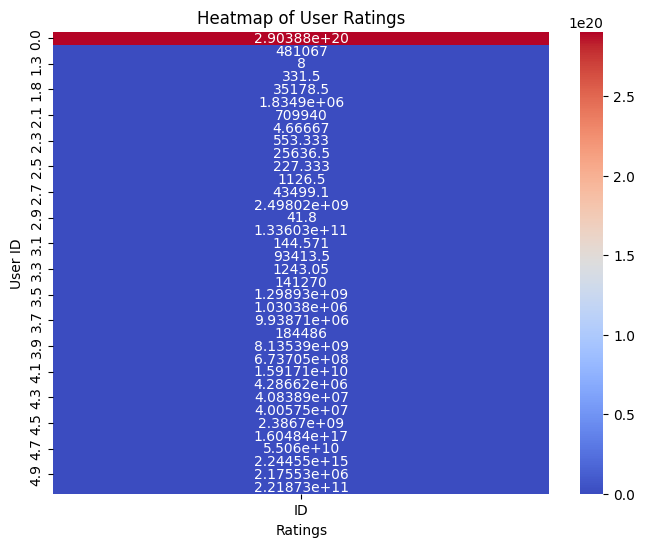

In [117]:
heatmap_data = train_data.pivot_table('ID', 'Rating')

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title('Heatmap of User Ratings')
plt.xlabel('Ratings')
plt.ylabel('User ID')
plt.show()

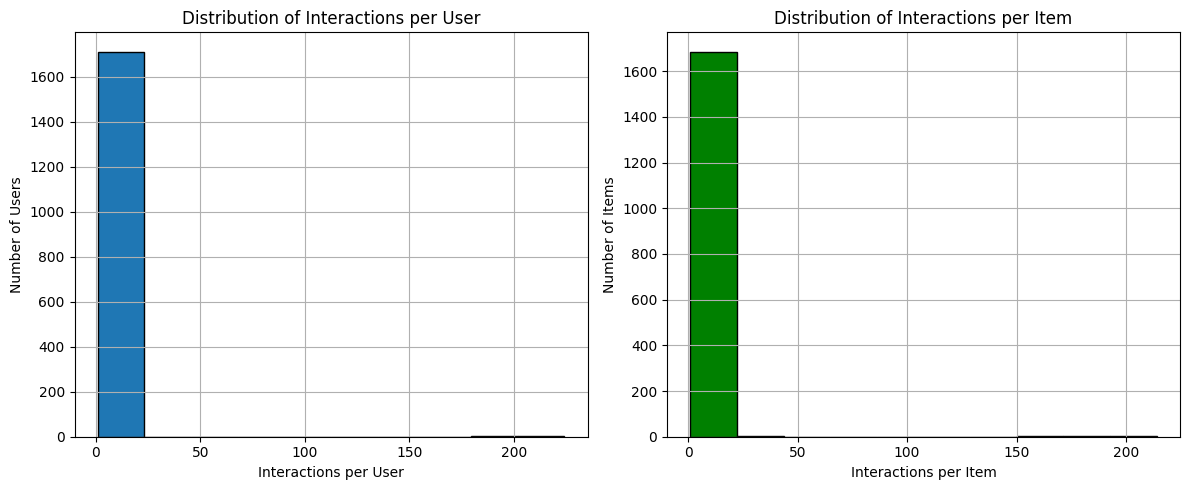

In [118]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
train_data['ID'].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel('Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Interactions per User')

plt.subplot(1, 2, 2)
train_data['ProdID'].value_counts().hist(bins=10, edgecolor='k',color='green')
plt.xlabel('Interactions per Item')
plt.ylabel('Number of Items')
plt.title('Distribution of Interactions per Item')

plt.tight_layout()
plt.show()

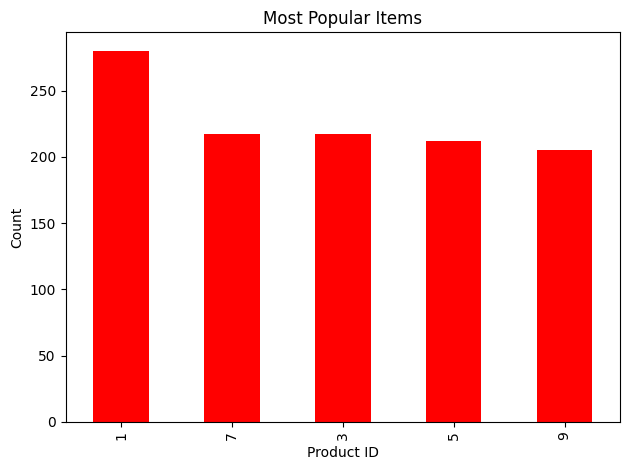

In [119]:
import matplotlib.pyplot as plt
import pandas as pd

# Make sure 'ProdID' is present and cleaned
train_data['ProdID'] = train_data['ProdID'].astype(str).str.extract(r'(\d+)')
train_data['ProdID'] = pd.to_numeric(train_data['ProdID'], errors='coerce')

# Drop NaNs to avoid plotting issues
popular_items = train_data['ProdID'].dropna().value_counts().head(5)

# Check if we have anything to plot
if not popular_items.empty:
    popular_items.plot(kind='bar', color='red')
    plt.title("Most Popular Items")
    plt.xlabel("Product ID")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
else:
    print("No valid product IDs to plot.")


<Axes: xlabel='Rating'>

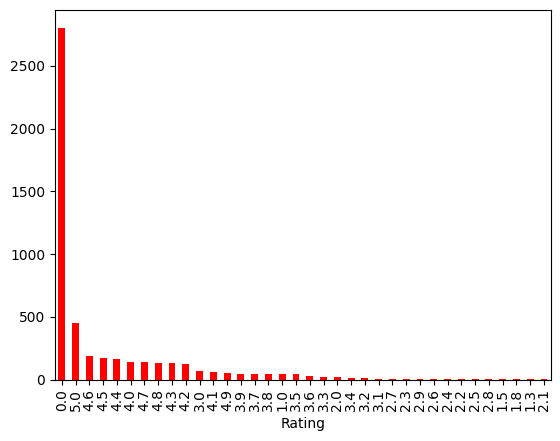

In [120]:
train_data['Rating'].value_counts().plot(kind='bar',color='red')


In [121]:
! pip install spacy

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

def clean_and_extract_tags(text):
    doc = nlp(text.lower())
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return ', '.join(tags)

columns_to_extract_tags_from = ['Category', 'Brand', 'Description']

for column in columns_to_extract_tags_from:
    train_data[column] = train_data[column].apply(clean_and_extract_tags)

In [ ]:
train_data['Tags'] = train_data[columns_to_extract_tags_from].apply(lambda row: ', '.join(row), axis=1